In [23]:
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython import display
import random
import statistics as stat
%run Backend_Retrieval.ipynb

In [24]:
def low_stdv_find(lst, rang):
    track = []
    track2 = []
    for i in range(len(lst)-rang):
        track.append(stat.stdev(lst[i:i+rang]))
        track2.append(i)
    ident = track2[track.index(min(track))]
    return lst[ident:ident+rang]

In [25]:
def detect_convergence(lst,epsilon):
    track3 = []
    for i in range(len(lst)):
        if stat.stdev(lst[-(i+100):])<epsilon:
            track3.append(-(i+100))
            break
    if len(track3)==0:
        b = low_stdv_find(lst,100)
        return b
    else:
        return lst[track3[0]:]

In [40]:
####################################################################
#          PARAMS
####################################################################
#start_time=time.perf_counter()

L= 1000       
splim = 31.2829 #70mph


des_speed=splim    
des_speed_inv=1/splim     
del_t= 0.1                   
acc_exp= 4                  
time_gap= 1               
min_gap= 2                  
comf_decel= 1.5               
acc_max= 1                 
length = 2                                          
 

#Parameter set-up
params=[]
params.append(des_speed_inv)
params.append(acc_exp)
params.append(time_gap)
params.append(comf_decel)
params.append(min_gap)
params.append(acc_max)
params.append(del_t)
params.append(length)
params.append(L)
####################################################################
#          PARAMETER SUMMARY
####################################################################
#  SETUP:
# acc exponent  = 4
# time_gap      = 1
# min space gap = 2
# comf decel    = 1.5
# max accel     = 1
# car length    = 2
##################################################################

In [41]:
####################################################################
#   BASIC SIMULATION COLLECTING GLOBAL METRICS AND ITTERATING PARAMS
####################################################################
#  SETUP:
# iterating 1 to 150 cars, normally well past jam point
# 1000 steps at 0.1 secs 
# Road length 625m(force jam) with all cars starting even distance in first 600m
# 15 m/s speed limit
####################################################################
#  PARAMS TO ITERATE OVER:
# acc exponent
# min distance(safety gap)
# comf decel
# max acel
####################################################################


# PLAN:

# RUN BASIC SIM AS ABOVE OVER 100 VALUES OF DESIRED PARAM(FIRST ACC EXPONENT)

# SAVE RESULTS IN 3x150x100 MATRIX OUTSIDE TRIPLE NESTED FOR LOOP PREPPED FOR PLOTTING

# PLOT 50 EVENLY SPACED VALUES ON FUNDAMENTAL DIAGRAMS

# INSIDE SIM:

# DETERMINE SET OF 100 VALS IN global_flow_list[N,:] WITH LOWEST STANDARD DEVIATION AND AVERAGE THIS
# USE THIS VALUE IN SAVE RESULTS MATRIX,,,,,,100 vals used after observing behaviour of flow at fixed density

# COMPARE FINAL DATA OF PARAM WITH COVARIANCE

####################################################################

ind = -1
Standard_Model = np.zeros((2,299))

for N in range(1,250):
    carflow = []
    caravvel = []
    vel= np.zeros(N)     
    pos = np.zeros(N)
    #start = np.linspace(0,1200,N)
    for j in range(N):
        pos[j] = j*(L/N)    
    acc= np.zeros(N)      
    headway = np.zeros(N)
    dv = np.zeros(N)
    for i in range(N):
        DisGap = 0
        if i+1!=N:
            if pos[i]>(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i]+L)
            elif pos[i]<(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i])
            dv[i] = vel[i]-vel[i+1]
        else:
            if pos[i]>(pos[0]-length):
                DisGap = (pos[0]-length-pos[i]+L)
            else:
                DisGap = (pos[0]-length-pos[i])
            dv[i] = vel[i]-vel[0]
        headway[i] = DisGap
    posnew= np.zeros(N)        
    velnew= np.zeros(N)
    time_pass=0

    for i in range(1000):

        posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)

        pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)

        den,flo = flow_global(N,vel,L)
        #dens_global[N-1] = den
        carflow.append(flo)
        count = 0
        for n in range(N):
            count += vel[n]
        caravvel.append(count/N)    
        time_pass+=del_t
    eq_flow = detect_convergence(carflow,1)
    Standard_Model[0,N-1] = stat.mean(eq_flow)

    eq_vel = detect_convergence(caravvel,1)
    Standard_Model[1,N-1] = stat.mean(eq_vel)
    print(Standard_Model[1,:])

    print(f'{N} completed')

np.save('Data Storage\Standard Model 1(2D)', AccExp_Variation)

[31.27259248  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0. 

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0. 

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.     

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.     

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.       

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.       

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.    

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.    

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.    

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.    

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  0.          0.
  0.          0.          0.          0.          0.         

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  0.          0.          0.          0.  

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  0.  

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

  0.          0.          0.          0.          0.        ]
139 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
143 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
146 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
153 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
159 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
164 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
170 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
176 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
180 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

  0.          0.          0.          0.          0.        ]
199 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
203 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

  0.          0.          0.          0.          0.        ]
212 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
220 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

  0.          0.          0.          0.          0.        ]
228 completed
[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

[31.27259248 31.24636202 31.20242398 31.14062238 31.06082456 30.96292318
 30.84683855 30.71252133 30.55995564 30.38916251 30.20020367 29.99318574
 29.76826462 29.52565013 29.26561076 28.98847844 28.6946531  28.38460699
 28.05888839 27.71812459 27.36302382 26.99437589 26.61305136 26.2199989
 25.81624071 25.40286601 24.98102237 24.55190519 24.11674542 23.67679579
 23.23331618 22.78755834 22.34075076 21.89408404 21.4486974  21.0056667
 20.56599445 20.13060179 19.7003229  19.27590157 18.85798993 18.44714916
 18.04385186 17.64848594 17.2613595  16.88270655 16.51269333 16.15142483
 15.79895136 15.45527513 15.12035638 14.7941194  14.47645793 14.16724019
 13.86631349 13.57350825 13.28864163 13.01152071 12.74194524 12.47971003
 12.22460699 11.97642684 11.7349606  11.50000075 11.27134225 11.04878333
 10.83212616 10.62117734 10.41574826 10.21565546 10.02072073  9.83077133
  9.64563999  9.465165    9.28919011  9.11756452  8.95014281  8.7867848
  8.62735546  8.47172476  8.31976755  8.17136337  8.02

NameError: name 'AccExp_Variation' is not defined

In [42]:
np.save('Data Storage\Standard Model 1(2D)', Standard_Model)

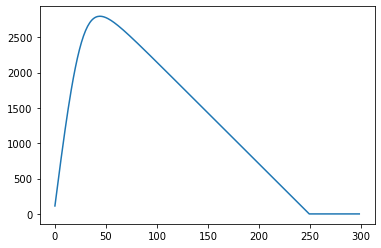

In [32]:
plt.plot(Standard_Model[0,:])